C:\Users\markd\anaconda3\envs\KLM\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  from ipykernel import kernelapp as app
C:\Users\markd\anaconda3\envs\KLM\lib\site-packages\ipykernel_launcher.py:80: FutureWarning: Pass y=[ 3.4976563e-07 -4.4448163e-07  1.1358528e-07 ... -5.0798483e-04
 -4.4316144e-04  0.0000000e+00], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


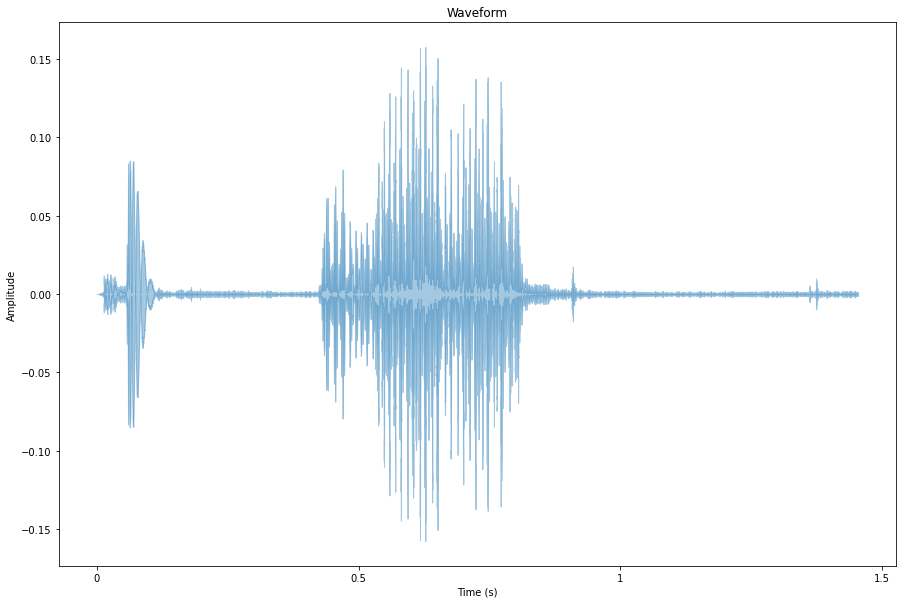

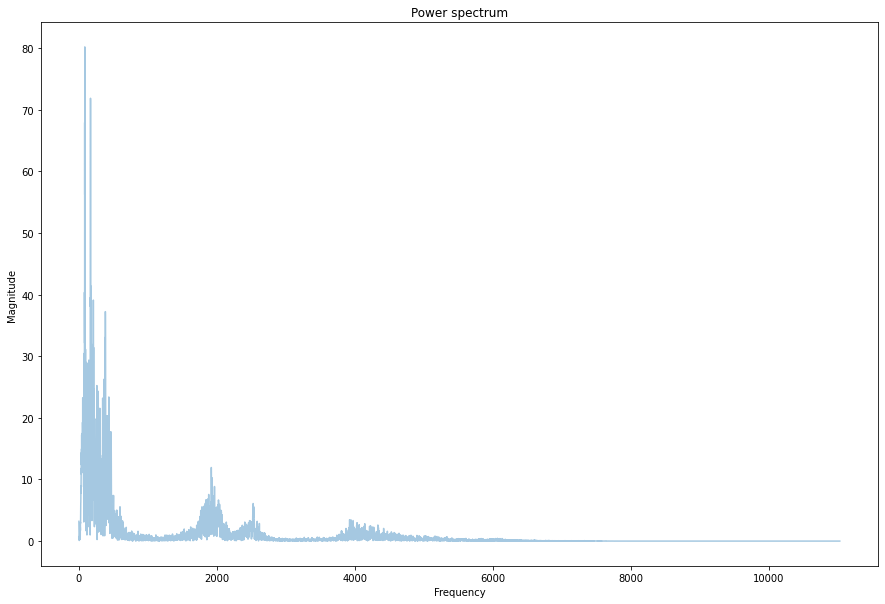

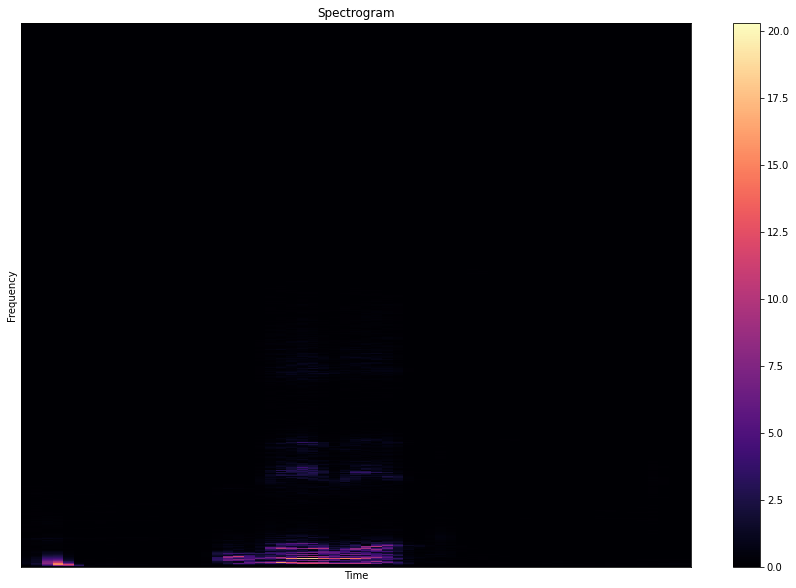

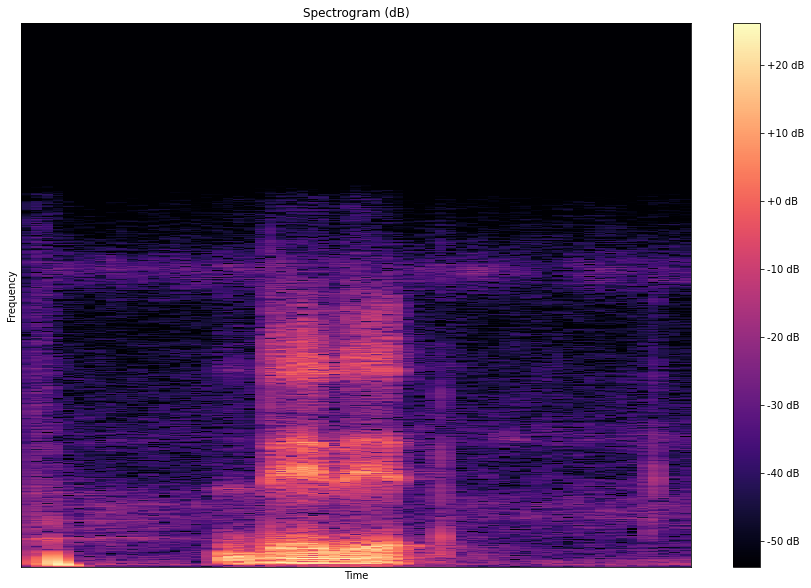

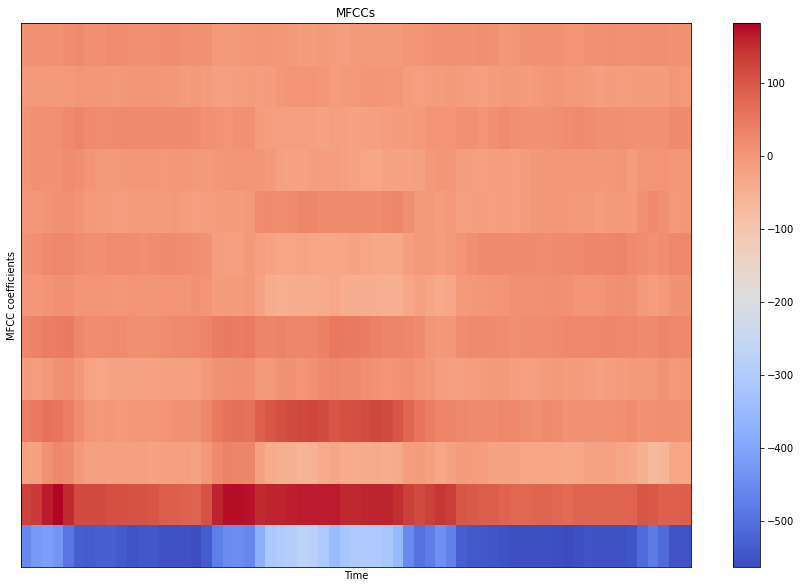

In [94]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt

FIG_SIZE = (15,10)

file = "d1.wav"

# load audio file with Librosa
signal, sample_rate = librosa.load(file, sr=22050)

# WAVEFORM
# display waveform
plt.figure(figsize=FIG_SIZE)
librosa.display.waveshow(signal, sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

# FFT -> power spectrum
# perform Fourier transform
fft = np.fft.fft(signal)

# calculate abs values on complex numbers to get magnitude
spectrum = np.abs(fft)

# create frequency variable
f = np.linspace(0, sample_rate, len(spectrum))

# take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

# plot spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")


# STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft)

# display spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

# apply logarithm to cast amplitude to Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")


# MFCCs
# extract 13 MFCCs
MFCCs = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

# display MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

# show plots
plt.show()

In [107]:
short_f=librosa.stft(signal,n_fft=512,hop_length=512)

In [108]:
len(short_f)

257

In [109]:
f = np.linspace(0, sample_rate, len(short_f))

In [110]:
short_mag=np.abs(short_f)

Text(0.5, 1.0, 'Power spectrum')

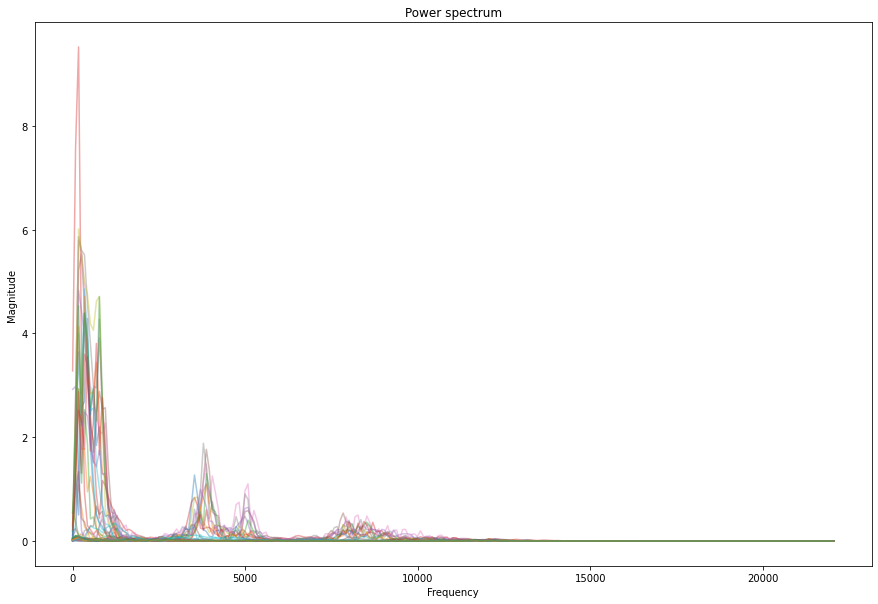

In [111]:
plt.figure(figsize=FIG_SIZE)
plt.plot(f, short_mag, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

In [112]:
thres=short_mag.max()/8

In [113]:
short_mag[short_mag<thres]=0

Text(0.5, 1.0, 'Power spectrum')

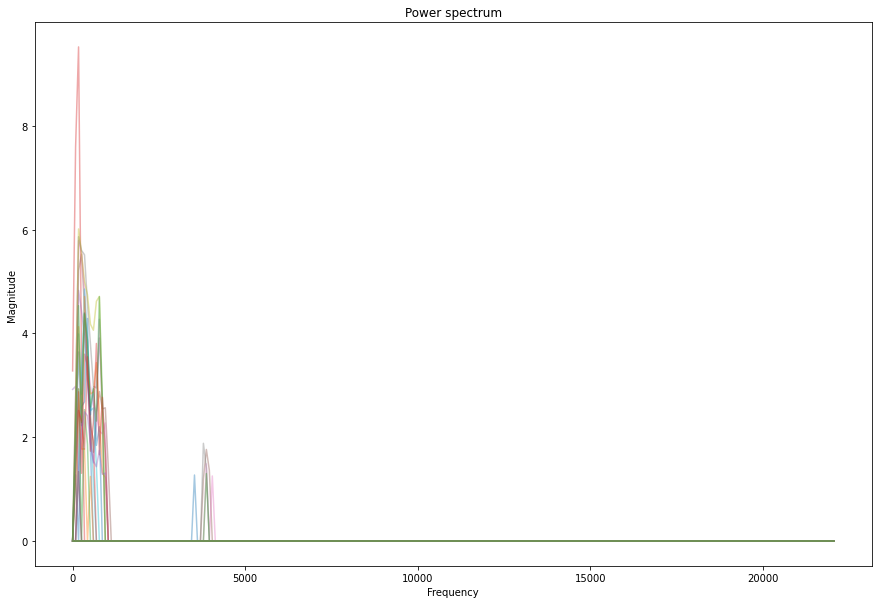

In [114]:
plt.figure(figsize=FIG_SIZE)
plt.plot(f, short_mag, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

In [115]:
denoised_signal=librosa.istft(short_mag,length=len(signal))

In [116]:
import IPython.display as ip

In [117]:
ip.Audio(data=denoised_signal,rate=sample_rate)

In [118]:
ip.Audio(data=signal,rate=sample_rate)

C:\Users\markd\anaconda3\envs\KLM\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  


Text(0.5, 1.0, 'Waveform')

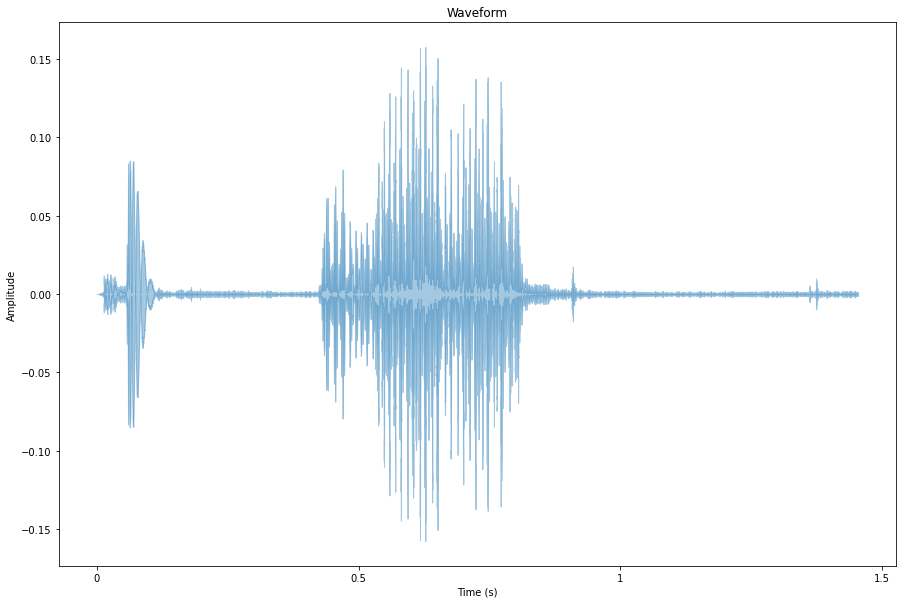

In [119]:
plt.figure(figsize=FIG_SIZE)
librosa.display.waveshow(signal, sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

C:\Users\markd\anaconda3\envs\KLM\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  


Text(0.5, 1.0, 'Waveform')

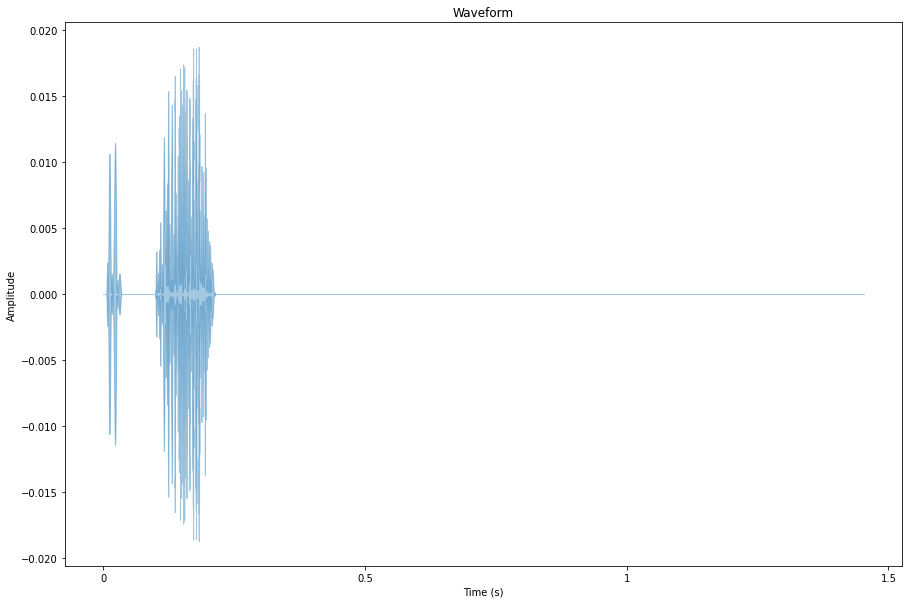

In [120]:
plt.figure(figsize=FIG_SIZE)
librosa.display.waveshow(denoised_signal, sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")